In [1]:
from dash import Dash, html, dcc, callback, Output, Input
import plotly.graph_objects as go
import dash_mantine_components as dmc
import networkx as nx
import numpy as np
import json
import pylab
import pandas as pd
from copy  import deepcopy as cp

In [2]:
from tqdm import tqdm

In [3]:
from graph_drawer import draw_graph
from graph_builder import GraphBuilder

from graph_on_single_alt import ng_graph

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-08-29 15:20:11 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES
2024-08-29 15:20:11 INFO: Downloaded file to C:\Users\User\stanza_resources\resources.json
2024-08-29 15:20:13 INFO: Loading these models for language: ru (Russian):
| Processor | Package            |
----------------------------------
| tokenize  | syntagrus          |
| pos       | syntagrus_charlm   |
| lemma     | syntagrus_nocharlm |
| depparse  | syntagrus_charlm   |
| ner       | wikiner            |

2024-08-29 15:20:13 INFO: Using device: cpu
2024-08-29 15:20:13 INFO: Loading: tokenize
c:\Users\

In [4]:
def make_Graph(n):
    g = nx.Graph()
    g.add_nodes_from(n)
    return(g)

import re

In [18]:
file_name = 'segmentation_dataset/4.txt'
import codecs
import re
f = codecs.open( file_name, "r", "utf_8_sig" )

ng_s = []
verbs = []
for line in f:
    if re.sub(r"[\n\t\s]*", "", line) == "":
        continue
    print("====")
    print(line)
    ng_ = ng_graph(line)
    ng_s.append([])
    verbs.append([])
    ng_s[-1] = [ng_.nodes[n]["ng_graph"] for n in ng_.nodes if ng_.nodes[n]["pos"] == "NG"]
    verbs[-1] = make_Graph([n for n in ng_.nodes if ng_.nodes[n]["pos"] == "VERB"])

====
Под концептуальной моделью ИИП будем понимать описание требований общих свойств и принципов функционирования ИИП

--------------------------------------------------------------------------------
под                 case                ADP                 моделью 19
концептуальный      amod                ADJ                 моделью 19
модель              obl                 NOUN                понимать 37
--------------------------------------------------------------------------------
иип                 nmod                PROPN               моделью 19
быть                aux                 AUX                 понимать 37
понимать            root                VERB                ИИП 109
--------------------------------------------------------------------------------
описание            obj                 NOUN                понимать 37
требование          nmod                NOUN                описание 46
общий               amod                ADJ                 свойств 7

In [6]:
builder = GraphBuilder()

2024-08-29 15:20:36 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES
2024-08-29 15:20:36 INFO: Downloaded file to C:\Users\User\stanza_resources\resources.json
2024-08-29 15:20:38 INFO: Loading these models for language: ru (Russian):
| Processor | Package            |
----------------------------------
| tokenize  | syntagrus          |
| pos       | syntagrus_charlm   |
| lemma     | syntagrus_nocharlm |
| depparse  | syntagrus_charlm   |
| ner       | wikiner            |

2024-08-29 15:20:38 INFO: Using device: cpu
2024-08-29 15:20:38 INFO: Loading: tokenize
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\stanza\models\tokenization\trainer.py:82: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construc

In [7]:
file_name = 'segmentation_dataset/4.txt'
import codecs
import re
f = codecs.open( file_name, "r", "utf_8_sig" )

grs = []
verbs = []
for line in f:
    if re.sub(r"[\n\t\s]*", "", line) == "":
        continue
    print("====")
    print(line)
    gr = builder.create_syntax_graph_for_sentence(line)
    grs.append(gr)

====
Под концептуальной моделью ИИП будем понимать описание требований общих свойств и принципов функционирования ИИП

--------------------------------------------------------------------------------
под                 case                ADP                 моделью 19
концептуальный      amod                ADJ                 моделью 19
модель              obl                 NOUN                понимать 37
--------------------------------------------------------------------------------
иип                 nmod                PROPN               моделью 19
быть                aux                 AUX                 понимать 37
понимать            root                VERB                ИИП 109
--------------------------------------------------------------------------------
описание            obj                 NOUN                понимать 37
требование          nmod                NOUN                описание 46
общий               amod                ADJ                 свойств 7

In [8]:
def display(G):
    print("---")
    for n in G.nodes:
        print(n)
    print("---")
    for e in G.edges:
        print(e)

In [9]:
def graph_sim(G1, G2):
    sim = 0
    for node in G1.nodes:
        if node in G2.nodes:
            sim += 1
    for edge in G1.edges:
        if edge in G2.edges or reversed(edge) in G2.edges:
            sim += 1
    return sim / (max([len(G1.nodes), len(G2.nodes)]) + max([len(G1.edges), len(G2.edges)]) if max([len(G1.nodes), len(G2.nodes)]) + max([len(G1.edges), len(G2.edges)]) != 0 else 1)



In [10]:
def edit_norm(G1, G2):
    ed = nx.graph_edit_distance(G1,G2)
    g_sum = len(G1.nodes) + len(G2.nodes)
    print( ed, g_sum)
    return ed / g_sum

In [20]:
sims = [[]]
for sent_1 in tqdm(ng_s):
    for sent_2 in (ng_s):
        sent_sim = 0
        for g1 in sent_1:
            for g2 in sent_2:
                sent_sim += graph_sim(g1,g2)
        sims[-1].append(sent_sim / max(1, max([len(sent_1), len(sent_2)])))
    sims.append([])

100%|██████████| 87/87 [00:04<00:00, 17.99it/s]


In [21]:
v_sims = [[]]
for sent_1 in tqdm(verbs):
    for sent_2 in (verbs):
        sent_sim = 0
        sent_sim += graph_sim(sent_1,sent_2)
        v_sims[-1].append(sent_sim)
    v_sims.append([])

100%|██████████| 87/87 [00:00<00:00, 1575.51it/s]


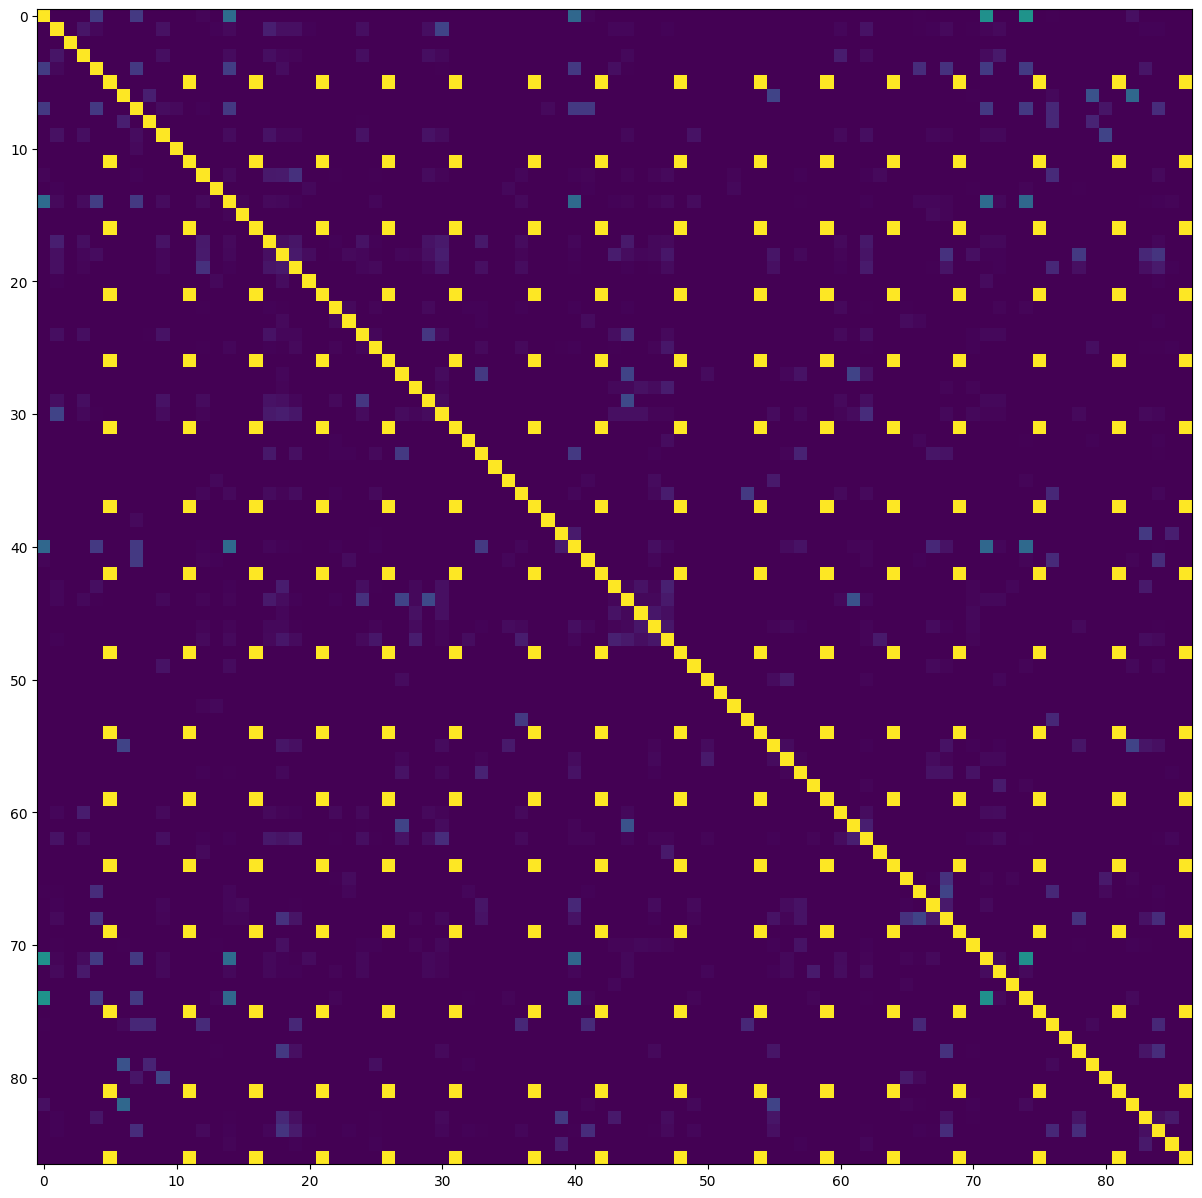

In [22]:
pylab.figure(figsize = (15,15))
pylab.imshow(np.array(sims[:-1]))# interpolation='nearest')

In [14]:
g_sims = [[]]
for sent_1 in tqdm(grs):
    for sent_2 in (grs):
        sent_sim = graph_sim(sent_1,sent_2)
        g_sims[-1].append(sent_sim)
    g_sims.append([])

100%|██████████| 87/87 [00:00<00:00, 619.75it/s]


In [15]:
grs[0].edges()

OutEdgeView([('концептуальный', 'модель'), ('модель', 'понимать'), ('иип', 'модель'), ('иип', 'функционирование'), ('быть', 'понимать'), ('описание', 'понимать'), ('требование', 'описание'), ('общий', 'свойство'), ('свойство', 'требование'), ('принцип', 'свойство'), ('функционирование', 'принцип')])

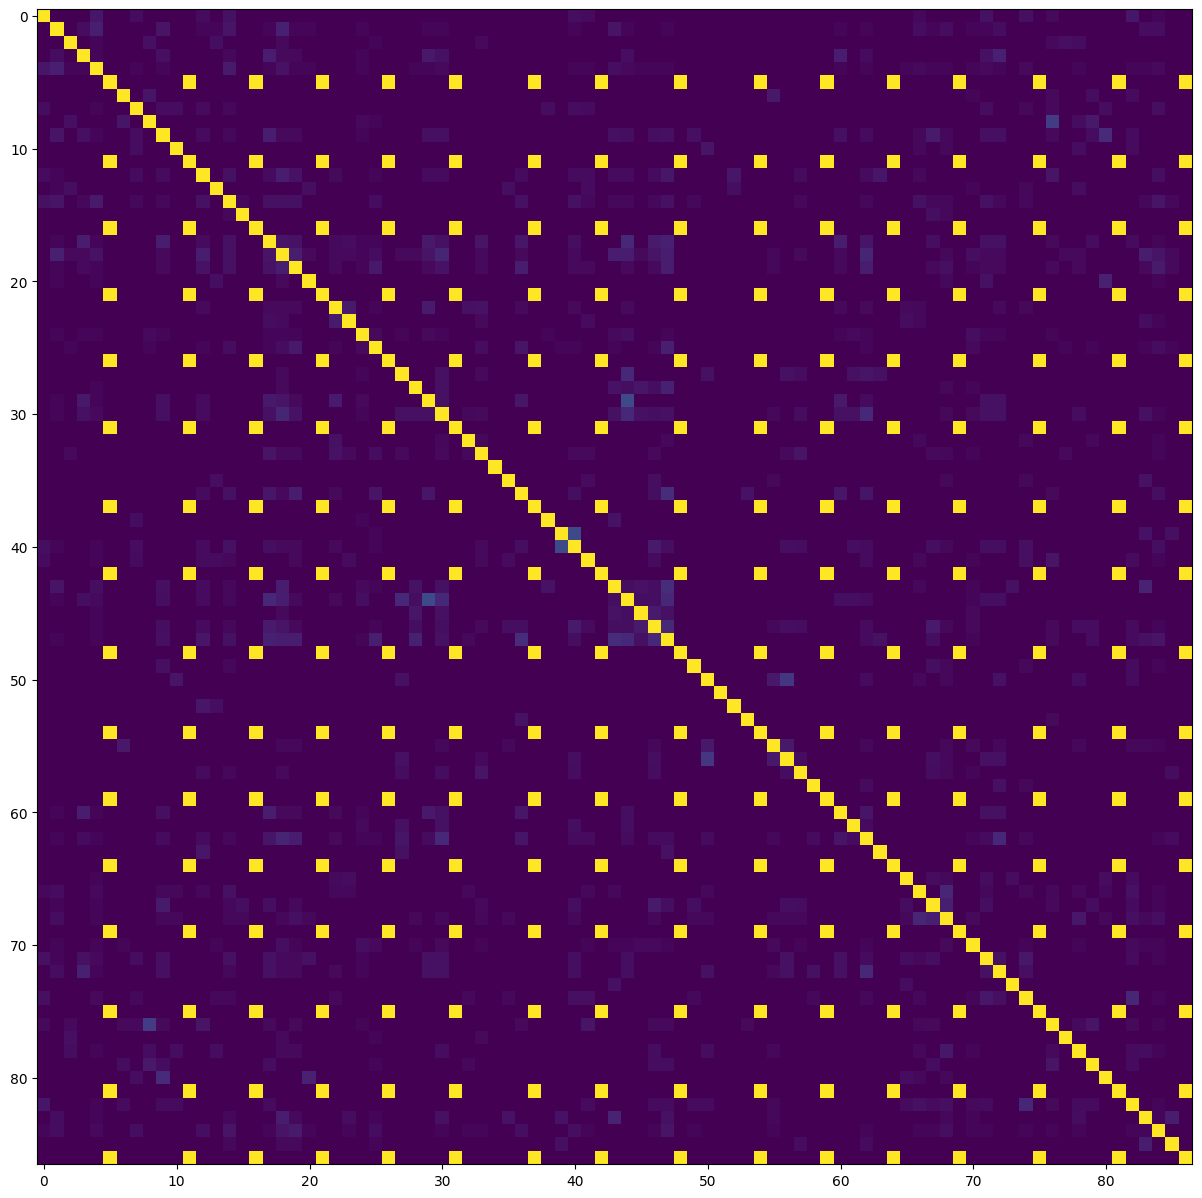

In [16]:
pylab.figure(figsize = (15,15))
pylab.imshow(np.array(g_sims[:-1]))# interpolation='nearest')

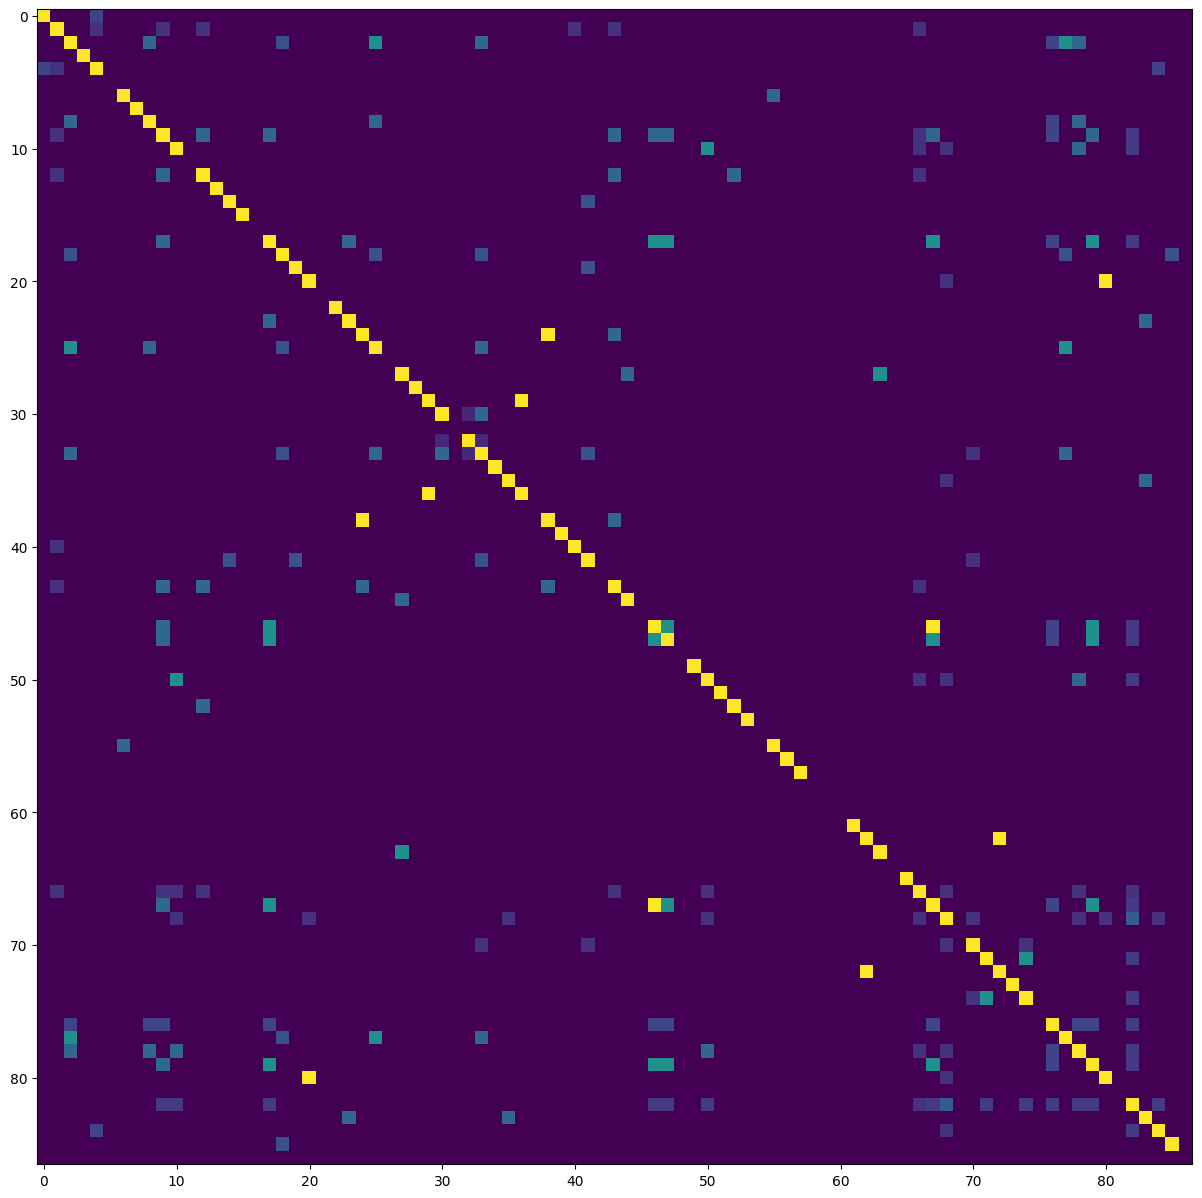

In [23]:

pylab.figure(figsize = (15,15))
pylab.imshow(np.array(v_sims[:-1]))# interpolation='nearest')